In [1]:
from pylab import *
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
sampRate, soundData = wavfile.read('440_sine.wav')

In [7]:
sampRate

44100

In [13]:
soundData.shape

(5292, 2)

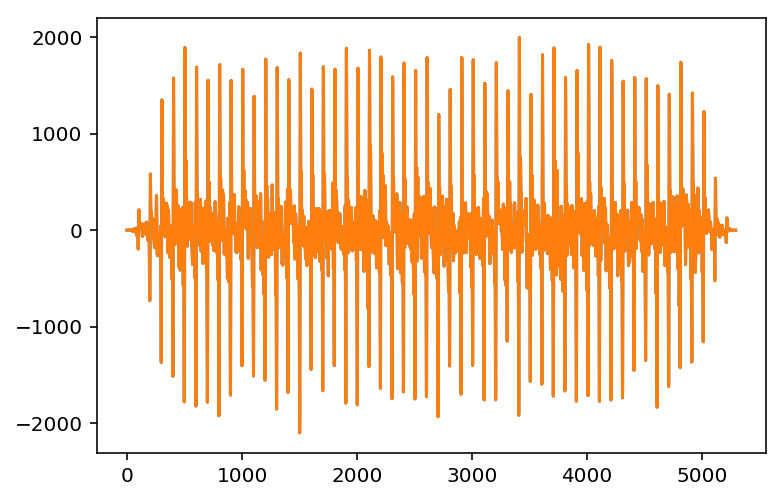

In [12]:
plt.plot(soundData)

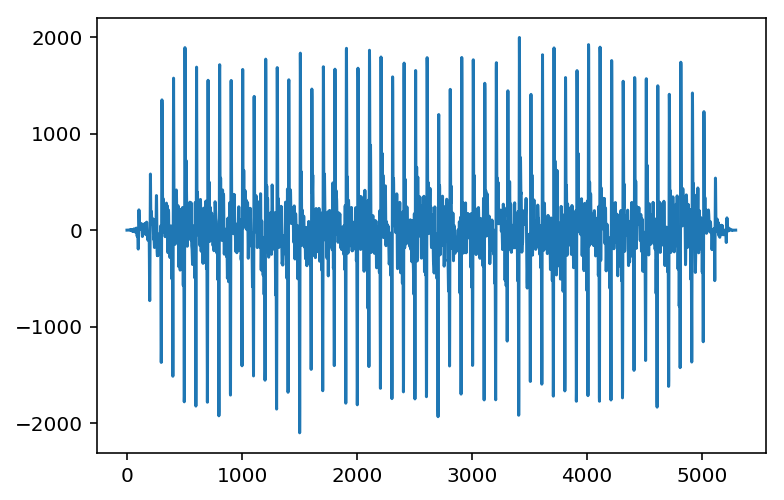

In [14]:
plt.plot(soundData[:,0])

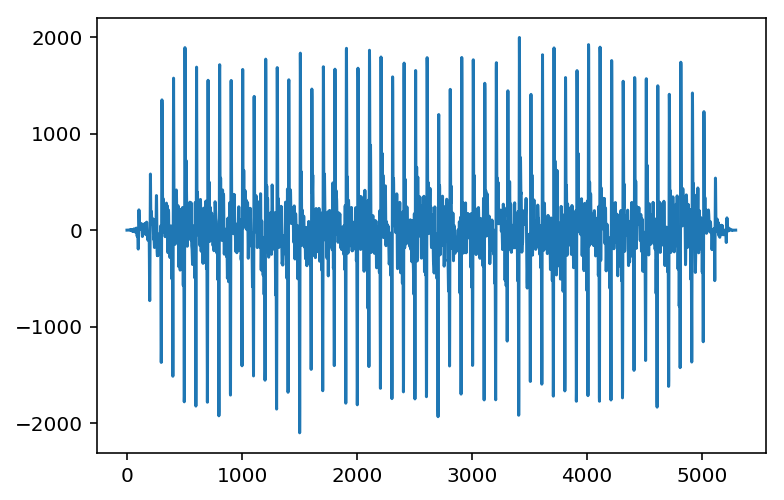

In [15]:
plt.plot(soundData[:,1])

In [16]:
sum(soundData[:,0]),sum(soundData[:,1])

(-11031, -11031)

In [17]:
(soundData[:,0] == soundData[:,1]).all()

True

In [18]:
soundData.dtype

dtype('int16')

In [19]:
2**16

65536

In [21]:
np.max(soundData), np.min(soundData)

(1995, -2099)

In [22]:
sampRate

44100

## Making Sounds

In [2]:
x = np.linspace(0, np.pi*2)
y = np.sin(x)

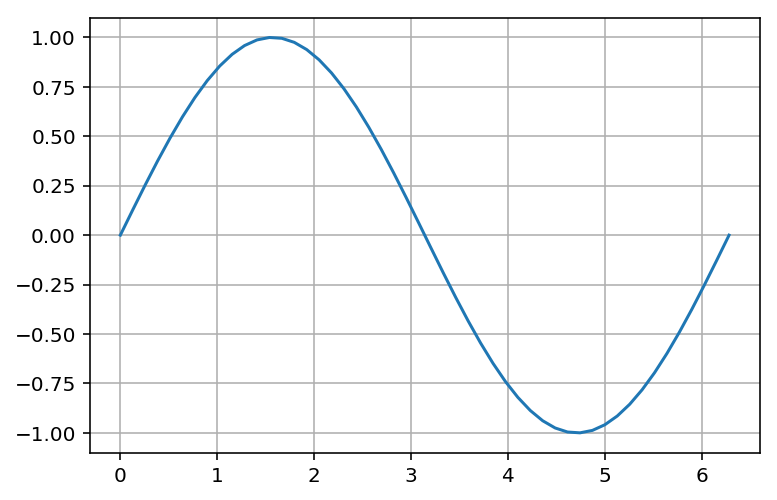

In [3]:
plt.plot(x,y)
plt.grid()

### Sin

In [17]:
time_sec = 5
hz = 20
sample_rate = 44100
start = 0
step = np.pi*2
end = hz * step * time_sec
time_line = np.linspace(start, end, sample_rate*time_sec)

sin_data = np.array([np.sin(time_line)*2**2]*2)
sin_data = sin_data.T

In [14]:
sin_data.shape

(220500, 2)

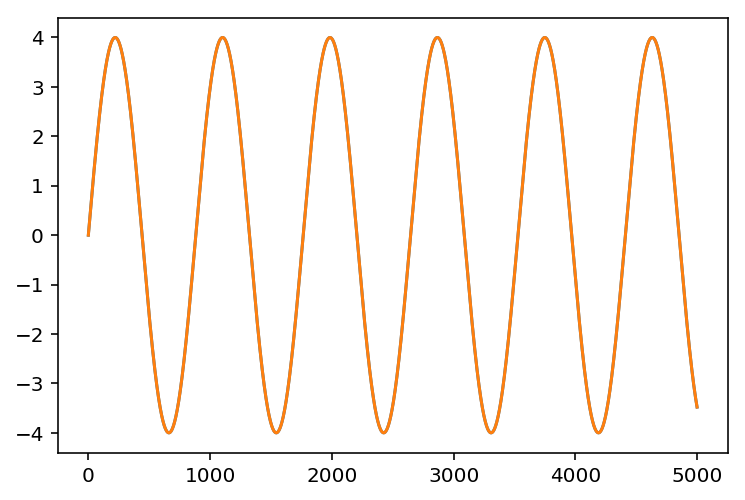

In [15]:
plt.plot(sin_data[:5000,:])

#### write to file

In [18]:
wavfile.write("sin_50.wav", sample_rate, sin_data)

In [55]:
def make_sin_sound(hz, time, file_name=None, sample_rate=44100):
    step = np.pi*2
    end = hz * step * time
    time_line = np.linspace(0, end, sample_rate*time)
    sin_data = np.array([np.sin(time_line)*2**14]*2, dtype=np.int16)
    sin_data = sin_data.T
    
    if file_name != None:
        wavfile.write(file_name, sample_rate, sin_data)
        
    return sin_data

In [54]:
for i in range(1001):
    make_sin_sound(i*20, 1, "sin_{}.wav".format(i*20))

In [56]:
time = 0.2
sample_rate = 44100
whole_data = np.array([])
for i in range(1001):
    hz = 20*i
    step = np.pi*2
    end = hz * step * time
    time_line = np.linspace(0, end, sample_rate*time)
    sin_data = np.sin(time_line)*2**14
    whole_data = np.concatenate((whole_data,sin_data))

/Users/Young/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [58]:
whole_data = np.array([whole_data]*2, dtype=np.int16)
whole_data = whole_data.T
whole_data.shape

(8828820, 2)

In [59]:
wavfile.write("difhz.wav", sample_rate, whole_data)

## New wave

In [60]:
8.9%3.5

1.9000000000000004

In [68]:
def clip(x, t=np.pi*2):
    x = x%t
    result = []
    for xx in x:
        if xx < np.pi:
            y = 1
        else:
            y = -1
        result.append(y)
    return np.array(result)

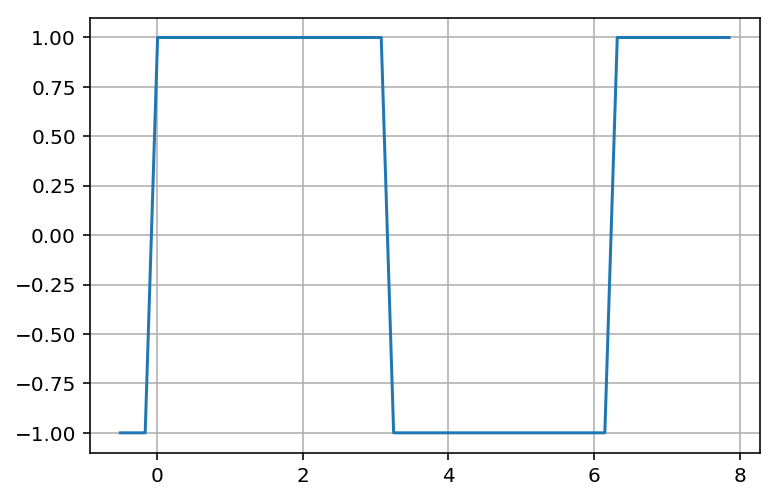

In [80]:
x = np.linspace(-0.5, np.pi*2.5)
y = clip(x)
plt.plot(x,y)
plt.grid()

In [70]:
def make_sound(hz, time, fun = np.sin, file_name=None, sample_rate=44100):
    step = np.pi*2
    end = hz * step * time
    time_line = np.linspace(0, end, sample_rate*time)
    sin_data = np.array([fun(time_line)*2**14]*2, dtype=np.int16)
    sin_data = sin_data.T
    
    if file_name != None:
        wavfile.write(file_name, sample_rate, sin_data)
        
    return sin_data

In [73]:
make_sound(200, 2, file_name="sin_200.wav");

In [74]:
make_sound(200, 2, fun=clip, file_name="clip_200.wav");

In [76]:
make_sound(200, 2, fun=np.cos, file_name="cos_200.wav");

In [77]:
add_sin = lambda x: np.sin(x)+2

In [78]:
make_sound(200, 2, fun=add_sin, file_name="sin_plus_200.wav");

In [81]:
def waves(x):
    return np.sin(x*2)+np.cos(x)

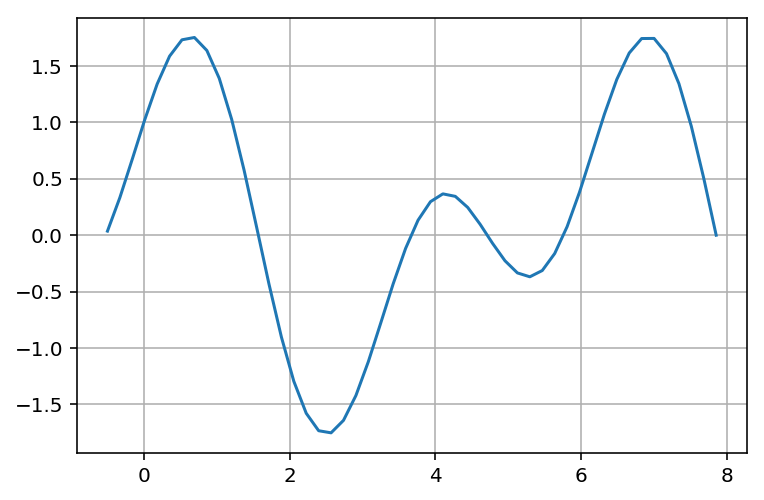

In [82]:
y = waves(x)
plt.plot(x,y)
plt.grid()

In [83]:
make_sound(200, 2, fun=waves, file_name="waves_200.wav");

In [84]:
make_sound(600, 2, fun=waves, file_name="waves_600.wav");

In [85]:
make_sound(600, 2, file_name="sin_600.wav");

In [86]:
make_sound(600, 2, fun=clip, file_name="clip_600.wav");